In [1]:
# p.380 16.5 単層ニューラルネットによる画像分類
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train / 255.0
x_test = x_test /255.0

y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [3]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy',
             optimizer=SGD(0.5),
             metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=75, verbose = 2)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 1s - loss: 0.3810 - acc: 0.8910
Epoch 2/100
 - 1s - loss: 0.3047 - acc: 0.9128
Epoch 3/100
 - 1s - loss: 0.2908 - acc: 0.9175
Epoch 4/100
 - 1s - loss: 0.2846 - acc: 0.9204
Epoch 5/100
 - 1s - loss: 0.2797 - acc: 0.9216
Epoch 6/100
 - 1s - loss: 0.2749 - acc: 0.9226
Epoch 7/100
 - 1s - loss: 0.2717 - acc: 0.9246
Epoch 8/100
 - 1s - loss: 0.2695 - acc: 0.9248
Epoch 9/100
 - 1s - loss: 0.2684 - acc: 0.9259
Epoch 10/100
 - 1s - loss: 0.2666 - acc: 0.9246
Epoch 11/100
 - 1s - loss: 0.2657 - acc: 0.9259
Epoch 12/100
 - 1s - loss: 0.2637 - acc: 0.9263
Epoch 13/100
 - 1s - loss: 0.2626 - acc: 0.9277
Epoch 14/100
 - 1s - loss: 0.2620 - acc: 0.9273
Epoch 15/100
 - 1s - loss: 0.2599 - acc: 0.9278
Epoch 16/100
 - 1s - loss: 0.2600 - acc: 0.9276
Epoch 17/100
 - 1s - loss: 0.2590 - acc: 0.9282
Epoch 18/100
 - 1s - loss: 0.2579 - acc: 0.9277
Epoch 19/100
 - 1s - loss

In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy =', score[1])

Accuracy = 0.9235


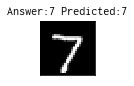

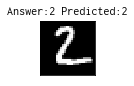

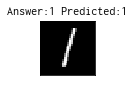

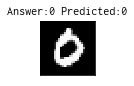

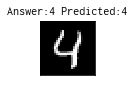

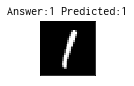

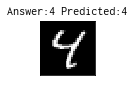

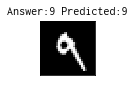

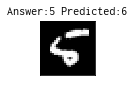

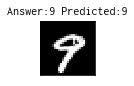

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

for i in range(10):
    plt.figure(figsize=(1, 1))
    
    score = model.predict(x_test[i].reshape(1, 28, 28))
    predicted = np.argmax(score)
    answer = np.argmax(y_test[i])
    
    plt.title('Answer:' + str(answer) + ' Predicted:' + str(predicted))
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()